In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

# Importing data

In [30]:
data=pd.read_csv('C:\\Users\\ASUS\\Downloads\\BankCustomerData.csv')
data

ID  age           job  marital  education  default  balance  \
0          1   58    management        2   tertiary        0     2143   
1          2   44    technician        1  secondary        0       29   
2          3   33  entrepreneur        2  secondary        0        2   
3          4   47   blue-collar        2    unknown        0     1506   
4          5   33       unknown        1    unknown        0        1   
...      ...  ...           ...      ...        ...      ...      ...   
42634  42635   21       student        1  secondary        0     2488   
42635  42636   87       retired        2    primary        0     2190   
42636  42637   34   blue-collar        2    primary        0     6718   
42637  42638   22       student        1  secondary        0      254   
42638  42639   32    management        1   tertiary        0     1962   

       housing  loan  day month  duration  campaign  pdays  previous  \
0            1     0    5   may       261         1     -1         0   
1            1     0    5   may       151         1     -1         0   
2            1     1    5   may        76         1     -1         0   
3            1     0    5   may        92         1     -1         0   
4            0     0    5   may       198         1     -1         0   
...        ...   ...  ...   ...       ...       ...    ...       ...   
42634        0     0   12   jan       661         2     92         1   
42635        0     0   12   jan       512         2     -1         0   
42636        0     0   13   jan       278         4     97         1   
42637        0     0   13   jan       143         2     -1         0   
42638        0     0   13   jan       130         1     -1         0   

       term_deposit  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
42634             1  
42635             1  
42636             0  
42637             1  
42638             0  

[42639 rows x 16 columns]

# Checking data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            42639 non-null  int64 
 1   age           42639 non-null  int64 
 2   job           42639 non-null  object
 3   marital       42639 non-null  int64 
 4   education     42639 non-null  object
 5   default       42639 non-null  int64 
 6   balance       42639 non-null  int64 
 7   housing       42639 non-null  int64 
 8   loan          42639 non-null  int64 
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  term_deposit  42639 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 5.2+ MB


In [32]:
data.isnull().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [33]:
data.duplicated().sum()

0

In [34]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper())
        print('=====================================')
        print(data[column].unique() ,"\n\n\n")

JOB
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 



EDUCATION
['tertiary' 'secondary' 'unknown' 'primary'] 



MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 





#Comment
As we can see the table above, the data set includes 16 columns and 42639 rows, of which 3 columns have the data type of object and 13 columns have the data type of number. And the data set contains no missing values and duplicates.

# Data processing

In [101]:
data1=pd.DataFrame(data)

In [102]:
#remove ID column
data1 = data1.iloc[:,1:]
data1

age           job  marital  education  default  balance  housing  loan  \
0       58    management        2   tertiary        0     2143        1     0   
1       44    technician        1  secondary        0       29        1     0   
2       33  entrepreneur        2  secondary        0        2        1     1   
3       47   blue-collar        2    unknown        0     1506        1     0   
4       33       unknown        1    unknown        0        1        0     0   
...    ...           ...      ...        ...      ...      ...      ...   ...   
42634   21       student        1  secondary        0     2488        0     0   
42635   87       retired        2    primary        0     2190        0     0   
42636   34   blue-collar        2    primary        0     6718        0     0   
42637   22       student        1  secondary        0      254        0     0   
42638   32    management        1   tertiary        0     1962        0     0   

       day month  duration  campaign  pdays  previous  term_deposit  
0        5   may       261         1     -1         0             0  
1        5   may       151         1     -1         0             0  
2        5   may        76         1     -1         0             0  
3        5   may        92         1     -1         0             0  
4        5   may       198         1     -1         0             0  
...    ...   ...       ...       ...    ...       ...           ...  
42634   12   jan       661         2     92         1             1  
42635   12   jan       512         2     -1         0             1  
42636   13   jan       278         4     97         1             0  
42637   13   jan       143         2     -1         0             1  
42638   13   jan       130         1     -1         0             0  

[42639 rows x 15 columns]

In [103]:
#find columns with unknown
def unknown(data_frame):
    columns = data_frame.columns

    presence_list = []
    for i in columns:
        if 'unknown' in data_frame[i].unique():
            presence_list.append(i)
    return presence_list

unknowns = unknown(data1)
unknowns

C:\Users\ASUS\AppData\Local\Temp/ipykernel_568/812066545.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


['job', 'education']

In [104]:
#dropping unknowns values 
unknowns = unknown(data1)
for i in unknowns[:2]:
    data1.drop(data1[data1[i]  == 'unknown'].index, inplace = True )

C:\Users\ASUS\AppData\Local\Temp/ipykernel_568/812066545.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


In [105]:
data1["job"] = data1["job"].map({'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4,
        'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11})
data1["education"] = data1["education"].map({'tertiary':1, 'secondary':2, 'primary':3})
data1["month"] = data1["month"].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})
data1

age  job  marital  education  default  balance  housing  loan  day  \
0       58    1        2          1        0     2143        1     0    5   
1       44    2        1          2        0       29        1     0    5   
2       33    3        2          2        0        2        1     1    5   
5       35    1        2          1        0      231        1     0    5   
6       28    1        1          1        0      447        1     1    5   
...    ...  ...      ...        ...      ...      ...      ...   ...  ...   
42634   21   11        1          2        0     2488        0     0   12   
42635   87    5        2          3        0     2190        0     0   12   
42636   34    4        2          3        0     6718        0     0   13   
42637   22   11        1          2        0      254        0     0   13   
42638   32    1        1          1        0     1962        0     0   13   

       month  duration  campaign  pdays  previous  term_deposit  
0          5       261         1     -1         0             0  
1          5       151         1     -1         0             0  
2          5        76         1     -1         0             0  
5          5       139         1     -1         0             0  
6          5       217         1     -1         0             0  
...      ...       ...       ...    ...       ...           ...  
42634      1       661         2     92         1             1  
42635      1       512         2     -1         0             1  
42636      1       278         4     97         1             0  
42637      1       143         2     -1         0             1  
42638      1       130         1     -1         0             0  

[40802 rows x 15 columns]

 In this data processing step, we will first remove the ID column so that the data set is left with only 15 columns and 40802 rows. Since the model only works with numeric data, we need to convert the job column, the education column, and the month column to numerical data and remove unknown data.

# Eda & Descriptive Statistics

In [15]:
import pandas_profiling as pp

In [16]:
pp.ProfileReport(data1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
data2=pd.DataFrame(data1)

In [18]:
#transform categorical columns into category Dtype
data2['job'] = data1['job'].astype('category')
data2['marital'] = data1['marital'].astype('category')
data2['education'] = data1['education'].astype('category')
data2['default'] = data1['default'].astype('category')
data2['housing'] = data1['housing'].astype('category')
data2['loan'] = data1['loan'].astype('category')
data2['month'] = data1['month'].astype('category')
data2['day'] = data1['day'].astype('category')
data2['term_deposit'] = data1['term_deposit'].astype('category')

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 42638
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           40802 non-null  int64   
 1   job           40802 non-null  category
 2   marital       40802 non-null  category
 3   education     40802 non-null  category
 4   default       40802 non-null  category
 5   balance       40802 non-null  int64   
 6   housing       40802 non-null  category
 7   loan          40802 non-null  category
 8   day           40802 non-null  category
 9   month         40802 non-null  category
 10  duration      40802 non-null  int64   
 11  campaign      40802 non-null  int64   
 12  pdays         40802 non-null  int64   
 13  previous      40802 non-null  int64   
 14  term_deposit  40802 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.5 MB


In [20]:
#iloc[row, column]

cat = data2.drop(data2.columns[[0,5,10,11,12,13]], axis=1)

In [21]:
data2.describe()

age        balance      duration      campaign         pdays  \
count  40802.000000   40802.000000  40802.000000  40802.000000  40802.000000   
mean      40.619700    1323.192098    256.146635      2.809078     34.528087   
std       10.115579    3003.459304    258.867137      3.126425     92.485485   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      61.000000    101.000000      1.000000     -1.000000   
50%       39.000000     424.000000    177.000000      2.000000     -1.000000   
75%       48.000000    1373.000000    314.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     58.000000    536.000000   

           previous  
count  40802.000000  
mean       0.471864  
std        2.197923  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

In [22]:
cat.describe()

job  marital  education  default  housing   loan    day  month  \
count   40802    40802      40802    40802    40802  40802  40802  40802   
unique     11        3          3        2        2      2     31     12   
top         4        2          2        0        1      0     20      5   
freq     9091    24690      22001    40024    23767  33851   2582  12974   

        term_deposit  
count          40802  
unique             2  
top                0  
freq           37012

In [24]:
d = cat.groupby(['term_deposit'])
d.describe().T

term_deposit          0     1
job       count   37012  3790
          unique     11    11
          top         4     1
          freq     8512   944
marital   count   37012  3790
          unique      3     3
          top         2     2
          freq    22730  1960
education count   37012  3790
          unique      3     3
          top         2     2
          freq    20149  1852
default   count   37012  3790
          unique      2     2
          top         0     0
          freq    36281  3743
housing   count   37012  3790
          unique      2     2
          top         1     0
          freq    22145  2168
loan      count   37012  3790
          unique      2     2
          top         0     0
          freq    30477  3374
day       count   37012  3790
          unique     31    31
          top        20    30
          freq     2413   234
month     count   37012  3790
          unique     12    12
          top         5     5
          freq    12210   764

# visualize

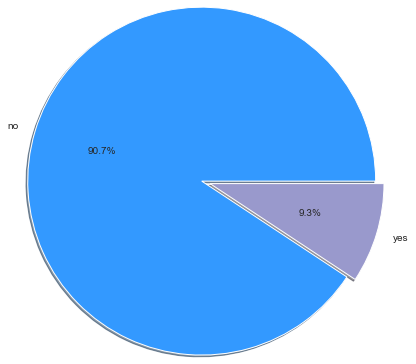

In [25]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(data1.groupby('term_deposit')['term_deposit'].count())
colors = ['#3399FF','#9999CC']
plt.pie(out_df['term_deposit'],labels=['no','yes'],autopct="%.1f%%",colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

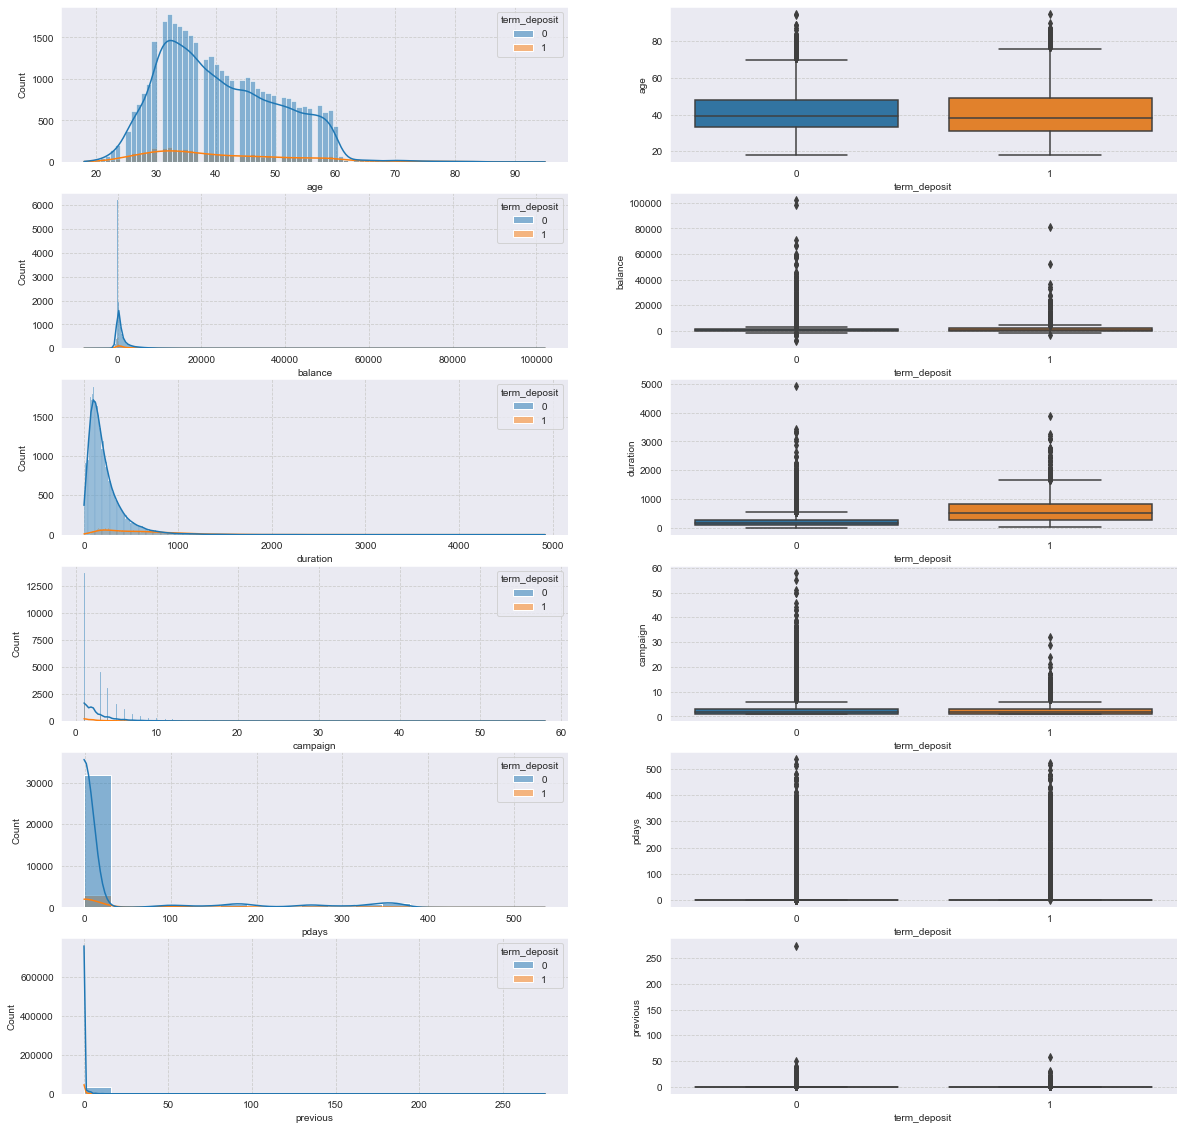

In [26]:

numerical_col = ['age','balance','duration','campaign','pdays','previous']
fig, ax = plt.subplots(6, 2, **{"figsize": (20, 20)})

type_graph = ['histplot', 'boxplot']

for i, graph in enumerate(type_graph):
    for j, numerical in enumerate(numerical_col):
        if graph == 'histplot':
            sns.histplot(data=data1, x=numerical, hue='term_deposit', ax=ax[j][i], kde=True)
        else:
            sns.boxplot(data=data1, x='term_deposit', y=numerical, ax=ax[j][i])


From the descriptive statistics table combined with visualize part, we see that the ratio of customers registering term deposits and not registering has a huge difference (10:90). The graph of the numerical columns also clearly shows the difference of 2 classes 1 and 0 when class 0 is both higher than class 1. The customers in this marketing campaign are mostly in the age group of 30 to 40 years old. And class 1 has higher volatility than class 0. 

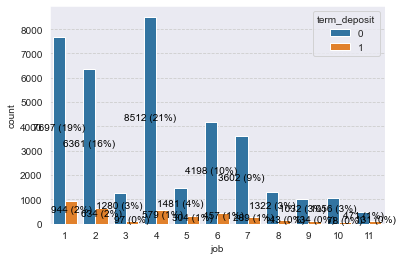

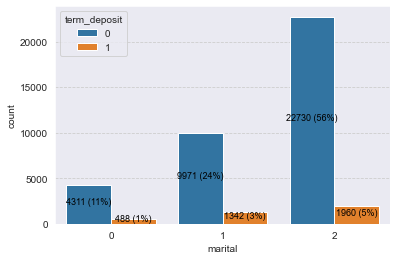

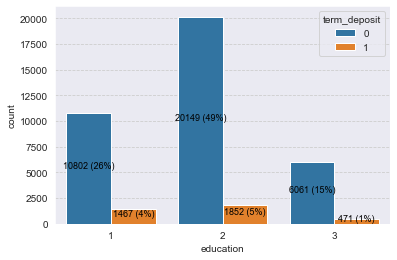

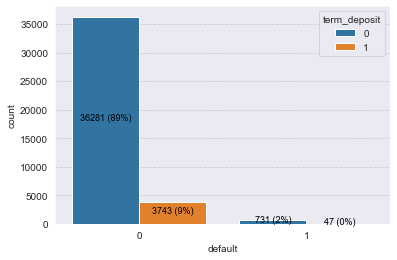

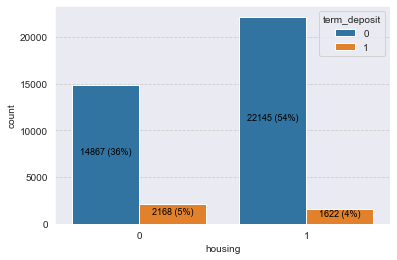

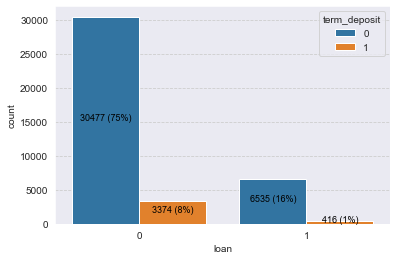

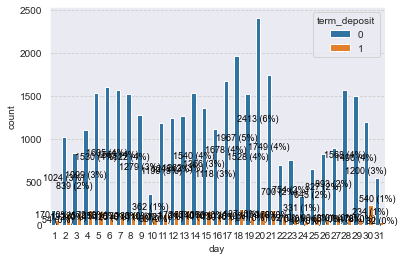

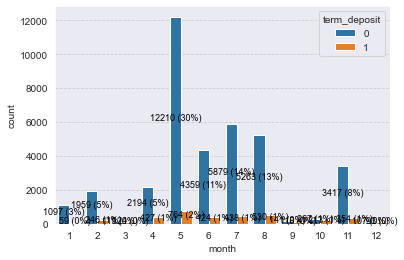

In [27]:
def cool_countplot(data=None, x=None, y=None, hue=None, text_size=9):
    ax = sns.countplot(data=data1, x=x, hue=hue)
    for p in ax.patches:
        ax.annotate(text=str(int(p.get_height())) + ' (' + '{:.0%}'.format(p.get_height()/data1.shape[0]) + ')',
                       xy=(p.get_x()+p.get_width()/2, p.get_height()/2), ha='center', color='black', size=text_size)
    return ax
cool_countplot(data=data1, x='job', hue='term_deposit', text_size=10)
plt.show()
cool_countplot(data=data1, x='marital', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='education', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='default', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='housing', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='loan', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='day', hue='term_deposit')
plt.show()
cool_countplot(data=data1, x='month', hue='term_deposit')
plt.show()




From the descriptive statistics table combined with the visual chart for the categorical columns with the target variable, we see that:

-(1) job: the number of customers doing blue_collar is the most contacted by the campaign compared to other occupations. In which, customers who do not participate in term deposit are mainly blue_collar and customers with management job will participate in term deposit the most.
    
-(2) marital: married customers are the most engaged customer group and also the most non-participating group of term deposits and the number of married customers is also higher than the two types remaining.

-(3) education: customers with secondary education are the largest and also the group with the largest number of registered and unregistered time deposits compared to other education levels .

-(4) default: customers without credit in default are the most.

-(5) housing: the number of customers with housing loan is more than customers without housing loan. And customers with housing loans tend not to participate in term deposits, while customers without housing loans tend to participate more.

-(6) loan: the number of customers without personal debt is more than that of customers with personal debt. And the group of customers without personal debt also tended to participate more and not participate more than the group of customers with personal debt.

-(7) day: the last contact date is at most on the 20th.

-(8) month: the most last contact month is in May.

# Correlation

In [40]:
pd.DataFrame(data1.corr().iloc[:,14])

term_deposit
age               0.009393
job               0.004031
marital          -0.045537
education        -0.058879
default          -0.015599
balance           0.044733
housing          -0.100272
loan             -0.051579
day              -0.027313
month             0.039247
duration          0.419340
campaign         -0.057778
pdays             0.031952
previous          0.032908
term_deposit      1.000000

In [41]:
correlation = data1.corr().iloc[:14,14].values

In [42]:
column_selected = [x for x in data1.columns if (x != 'term_deposit')]
column_selected

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [43]:
features_importances_corr = pd.DataFrame({'FeatureName': data1[column_selected].columns[0:len(data1[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
10    duration                         0.419340
6      housing                        -0.100272
3    education                        -0.058879
11    campaign                        -0.057778
7         loan                        -0.051579
2      marital                        -0.045537
5      balance                         0.044733
9        month                         0.039247
13    previous                         0.032908
12       pdays                         0.031952
8          day                        -0.027313
4      default                        -0.015599
0          age                         0.009393
1          job                         0.004031

<AxesSubplot:ylabel='FeatureName'>

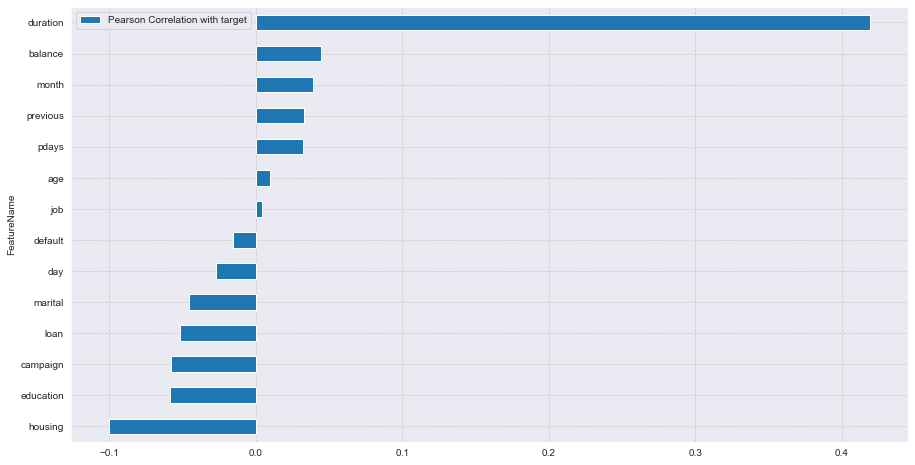

In [44]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

Looking at the correlation coefficient and the chart, we see that the degree of correlation of the variables with the target variable is not too high. In which, the top 5 most important variables are duration, housing, education, campaign and loan. And all variables are negatively correlated with the target variable except the duration variable.

# checking imbalanced data

In [45]:
no = len(data1[data1['term_deposit'] == 0])
yes = len(data1[data1['term_deposit'] == 1])
Percentage = (yes / (yes + no)) * 100

print("Number of clients did not subscribe a term deposit: ", no)
print("Number of clients subscribed a term deposit: ",yes)
print("The Percentage of clients subscribed a term deposit: {:.4f}".format(Percentage))

Number of clients did not subscribe a term deposit:  37012
Number of clients subscribed a term deposit:  3790
The Percentage of clients subscribed a term deposit: 9.2888


In [46]:
from sklearn.utils import resample

In [47]:
#Upsampling
df_majority = data1[data1['term_deposit']==0]
df_minority = data1[data1['term_deposit']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=37012,random_state = 123)
balanced_dft = pd.concat([df_minority_upsampled,df_majority])
balanced_dft['term_deposit'].value_counts()

1    37012
0    37012
Name: term_deposit, dtype: int64

In [96]:
pd.DataFrame(balanced_dft.corr().iloc[:,14])


term_deposit
age               0.014144
job               0.003083
marital          -0.075159
education        -0.102819
default          -0.031749
balance           0.073906
housing          -0.174338
loan             -0.095177
day              -0.044851
month             0.061972
duration          0.491323
campaign         -0.115178
pdays             0.053873
previous          0.059503
term_deposit      1.000000

As we know the data set is seriously unbalanced so fix with upsampling and run the correlation again, the result is still the same, the top 5 important variables remain unchanged so we will choose these 5 variables including duration, housing, campaign, loan, education to run the model.

# Model: using decision tree to predict

The reason for choosing the decision tree model is that the result that the decision tree provides is very clear, easy to understand, and easy to analyze, giving the rules for quick recognition (subscribed/unsubscribed) and  Another rules for more complicated cases helps us to realize the ability of customers to register for term deposits quickly while ensuring high accuracy. In addition, this model requires less data preparation compared to other machine learning algorithms. And Decision trees are non-parametric, which means that they do not make any assumptions about the distribution of the data or the structure of the classifier.

In [48]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [49]:
#import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [50]:
target = ['term_deposit']
features = ['duration', 'housing', 'campaign', 'loan', 'education']

In [51]:
print('Target: ', target)
print('Features: ', features)

Target:  ['term_deposit']
Features:  ['duration', 'housing', 'campaign', 'loan', 'education']


In [67]:
X_over = balanced_dft[features].values
y_over = balanced_dft[target].values

n_state = 42
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.2, random_state=n_state)

In [53]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_over_train, y_over_train.ravel())

y_over_pred = DT_classifier.predict(X_over_train)
print(confusion_matrix(y_over_train,y_over_pred))
print(classification_report(y_over_train,y_over_pred))
print('Decision Tree accuracy: ', accuracy_score(y_over_train, y_over_pred))

[[26935  2699]
 [  801 28784]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     29634
           1       0.91      0.97      0.94     29585

    accuracy                           0.94     59219
   macro avg       0.94      0.94      0.94     59219
weighted avg       0.94      0.94      0.94     59219

Decision Tree accuracy:  0.94089734713521


There are 29634 customers who are predicted to not subscribe a term deposit, but in fact, there are 2699 customers who subcribe. And there are 29585 customers who are predicted to subscribe a term deposit, but in fact, there are 801 customers who do not. For class 0, the precision is 0.97, which means that 97% of the instances predicted as class 0 by the model are actually class 0.  The recall is 0.91, which means that 91% of the actual class 0 instances were correctly predicted by the model. The f1-score is 0.94, which balances both precision and recall. For class 1, the precision is 0.91, which means that 91% of the instances predicted as class 1 by the model are actually class 1. The recall is 0.97, which means 97% of the actual class 1 instances were correctly predicted by the model. These metrics suggest that the model is performing reasonably well in predicting both classes. Accuracy of the model on the train set is 0.9408.

In [54]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_over_train, y_over_train.ravel())

y_over_pred = DT_classifier.predict(X_over_test)
print(confusion_matrix(y_over_test,y_over_pred))
print(classification_report(y_over_test,y_over_pred))
print('Decision Tree accuracy: ', accuracy_score(y_over_test, y_over_pred))

[[6370 1008]
 [ 252 7175]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7378
           1       0.88      0.97      0.92      7427

    accuracy                           0.91     14805
   macro avg       0.92      0.91      0.91     14805
weighted avg       0.92      0.91      0.91     14805

Decision Tree accuracy:  0.9148936170212766


There are 7378 customers who are predicted to not subscribe a term deposit, but in fact, there are 1008 customers who subcribe. And there are 7427 customers who are predicted to subscribe a term deposit, but in fact, there are 252 customers who do not. For class 0, the precision is 0.96, which means that 96% of the instances predicted as class 0 by the model are actually class 0.  The recall is 0.86, which means that 86% of the actual class 0 instances were correctly predicted by the model. The f1-score is 0.91, which balances both precision and recall. For class 1, the precision is 0.88, which means that 88% of the instances predicted as class 1 by the model are actually class 1. The recall is 0.97, which means 97% of the actual class 1 instances were correctly predicted by the model. The f1-score is 0.92. These metrics suggest that the model is performing well in predicting both classes, and the model predicts slightly better for class 1 than for class 0. Accuracy of the model on the test set is 0.9148.

=> With this result, it can be seen that this model is quite suitable for the goal of predicting that as many customers are likely to participate in term deposit through the bank's marketing campaign as possible because this is the customers that the Bank aims to serve and persuade them to use its products. Thanks to the model, it will help customers reduce costs, bank time and effort but still bring high efficiency.

In [55]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data1.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
0    duration                          0.756737
2    campaign                          0.094313
1     housing                          0.064148
4   education                          0.050042
3        loan                          0.034760

<AxesSubplot:ylabel='FeatureName'>

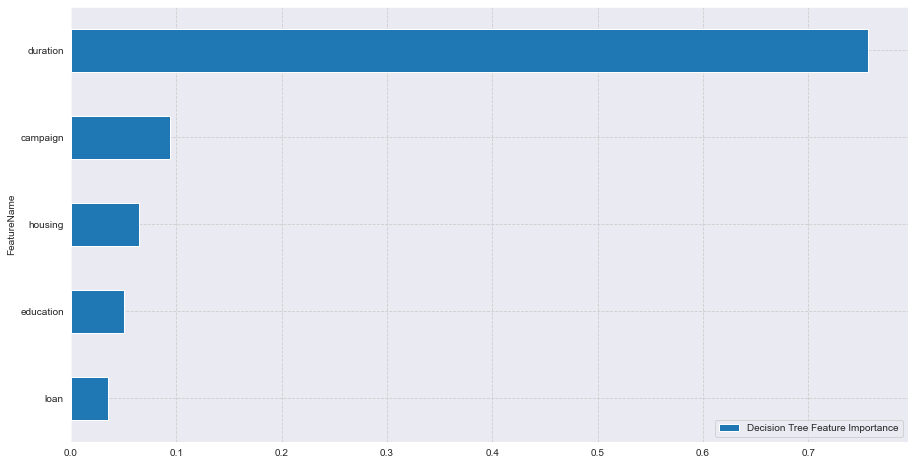

In [56]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

C:\Users\ASUS\AppData\Local\Temp/ipykernel_568/1252486500.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_568/1252486500.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


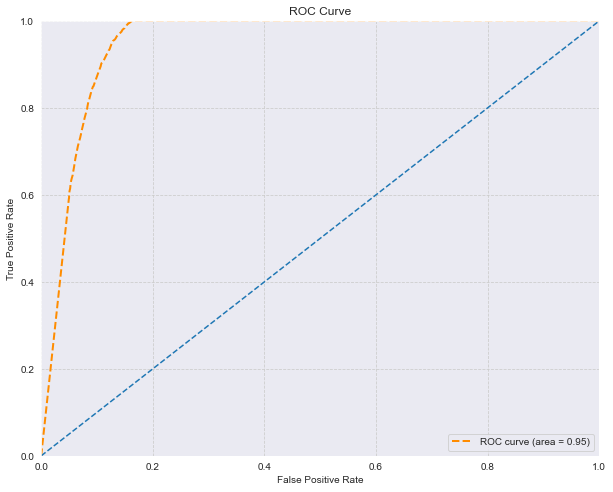

In [57]:
y_over_pred_prob_test = DT_classifier.predict_proba(X_over_test)[:, 1]
fpr, tpr, thres = roc_curve(y_over_test, y_over_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

Based on the chart above, we can see that the ROC curve is very far from the diagonal and the ROC Curve (area = 0.95) is the model that explains 95% of the data set. This indicates that the model is able to effectively separate positive and negative instances and has a relatively low rate of false classifications. With this result, the Decision Tree model has good performance.

In [75]:
from sklearn import tree

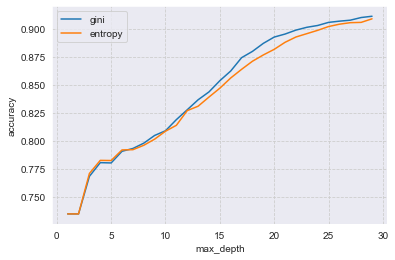

In [61]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_over_train, y_over_train)
 pred = dtree.predict(X_over_test)
 acc_gini.append(accuracy_score(y_over_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_over_train, y_over_train)
 pred = dtree.predict(X_over_test)
 acc_entropy.append(accuracy_score(y_over_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [87]:
X_plot_tree = balanced_dft[features]

Note:Class 1 is yes and class 0 is no


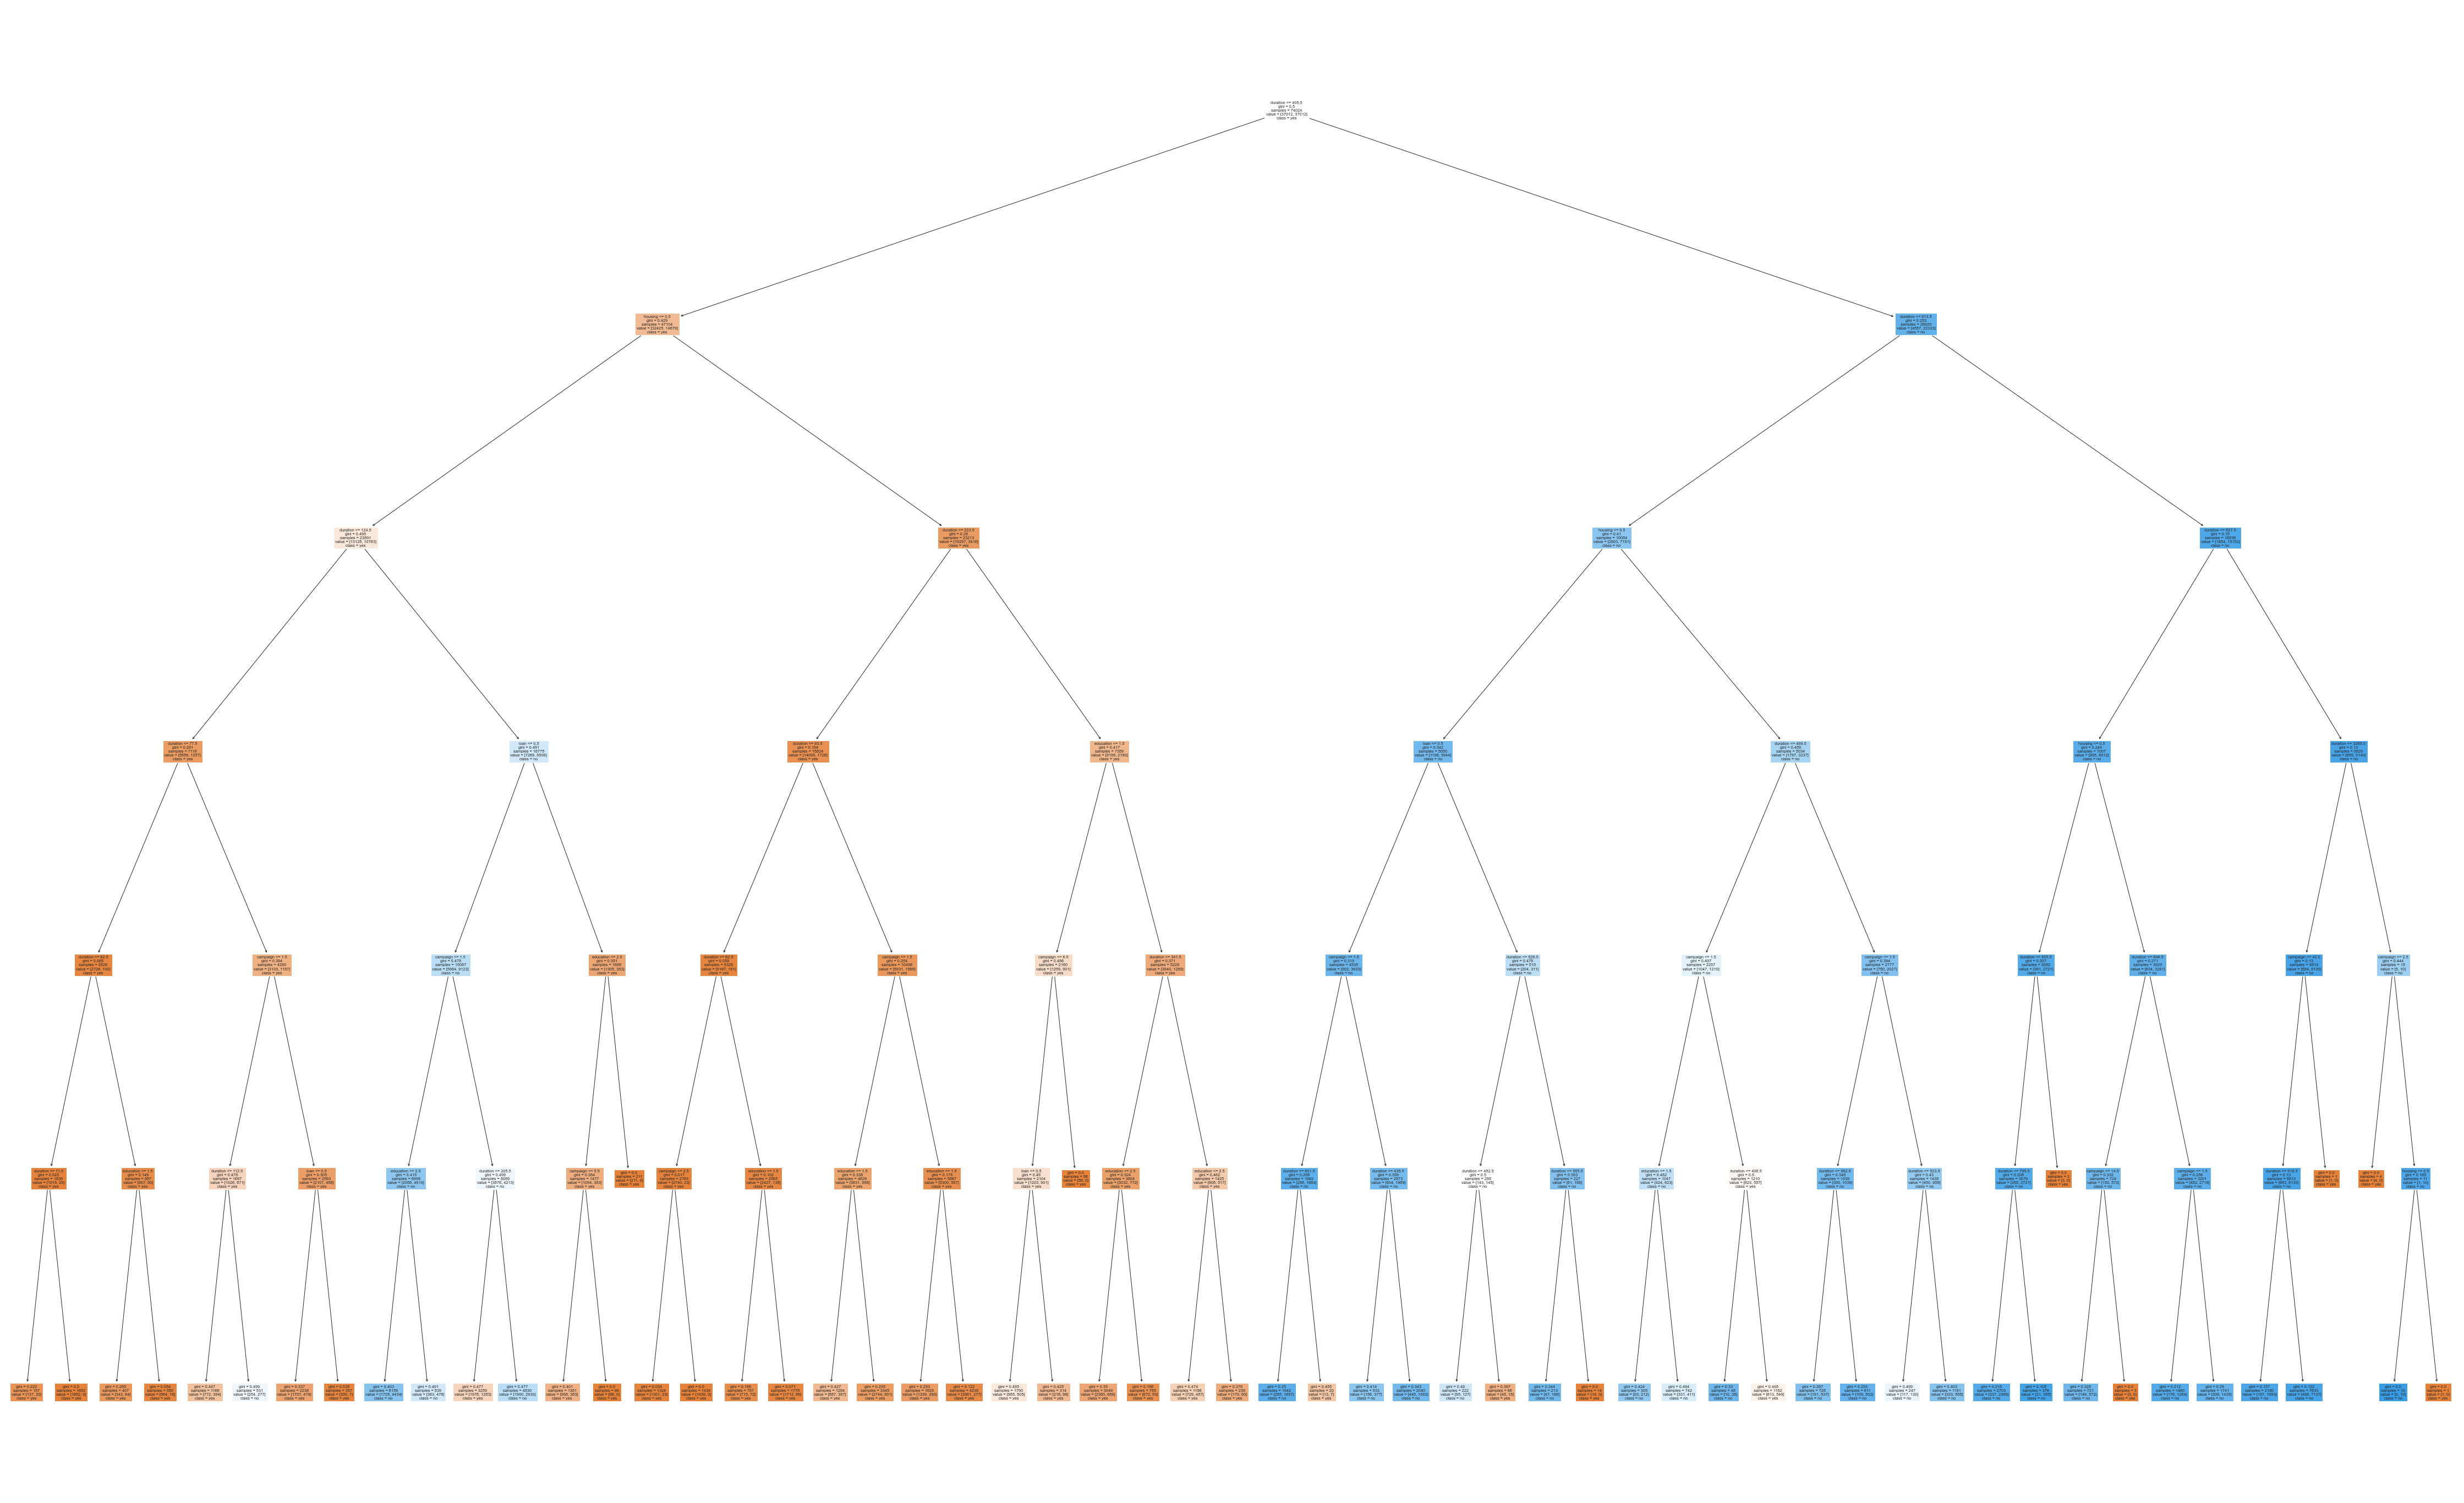

In [93]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=6)
clf.fit(X_plot_tree.values, y_over.ravel())
print('Note:Class 1 is yes and class 0 is no')
fig = plt.figure(figsize=(80,50))
_ = tree.plot_tree(clf,
                 feature_names=features,
                 class_names=['yes','no'],
                 filled=True)

From the decision tree image, we can build the rule of fast prediction as follows:
- Customers with last contact duration from greater than 11.5s to 62.5s and do not have housing loan will definitely register for a term deposit.
- Customers with last contact duration greater than 3265.5s, number of contacts performed during this campaign and for this client is greater than 2.5 and no housing loan will not participate in term deposit.